In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd
from sklearn.model_selection import train_test_split

## I - Affichage et étude des données : 

###a - Affichage : 

In [2]:
df = pd.read_csv('datasets_2323_3921_forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### b - Générer des statistiques descriptives : 


---
    
    
  Les statistiques descriptives comprennent celles qui résument la tendance centrale, la dispersion et la forme de la distribution d'un ensemble de   données, à l'exclusion des NaNvaleurs.

---


In [3]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


###c - Changement de données : 

---
Pour notre cas, j'ai constaté qu'il existe des chaines de caractères dans les colonnes 'month' et 'day'. Donc, il faut les  séparer chaque chaîne de la série d'appelants au séparateur passé. Une trame de données est retournée avec toutes les valeurs possibles après la division de chaque chaîne. Si la valeur de texte dans le bloc de données d'origine au même index contient la chaîne (nom de colonne / valeurs fractionnées), la valeur à cette position est 1 sinon, 0. En utilisant get_dummies de pandas. 


---

In [4]:
df = pd.get_dummies(df)
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


###d - Vérifier s'il manque des valeurs : 

In [5]:
print("is there missing values?  : \n", df.isnull().values.any())

is there missing values?  : 
 False


# II - Prédiction et étude de resultat ( Multiple Linear Regression ) : 

---
###la régression linéaire multiple (MLR) : 
La régression linéaire multiple (MLR), également connue simplement sous le nom de régression multiple, est une technique statistique qui utilise plusieurs variables explicatives pour prédire le résultat d'une variable de réponse. L'objectif de la régression linéaire multiple (MLR) est de modéliser la relation linéaire entre les variables explicatives (indépendantes) et la réponse (dépendante).

---


---
La formule suivante est un modèle de régression linéaire multiple.

Y = Β 0 + Β 1 X 1 + Β 2 X 2  +… ..Β p Xp 

Où:

X, X 1 , Xp  - la valeur de la variable indépendante,
Y - la valeur de la variable dépendante ( target ).
Β 0 - est une constante (montre la valeur de Y lorsque la valeur de X = 0)
Β 1,  Β 2 , Βp - le coefficient de régression (montre combien Y change pour chaque changement d'unité dans X)

---

In [6]:
from sklearn.linear_model import LinearRegression

###a - Divisez les données en train set et test set : 

In [7]:
X = df.iloc[:,:-1]
Y = df['area']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 104
number of training samples: 413


###b - Visualisation de la donnée 'area' (target) en fonction de différentes colonnes  : 

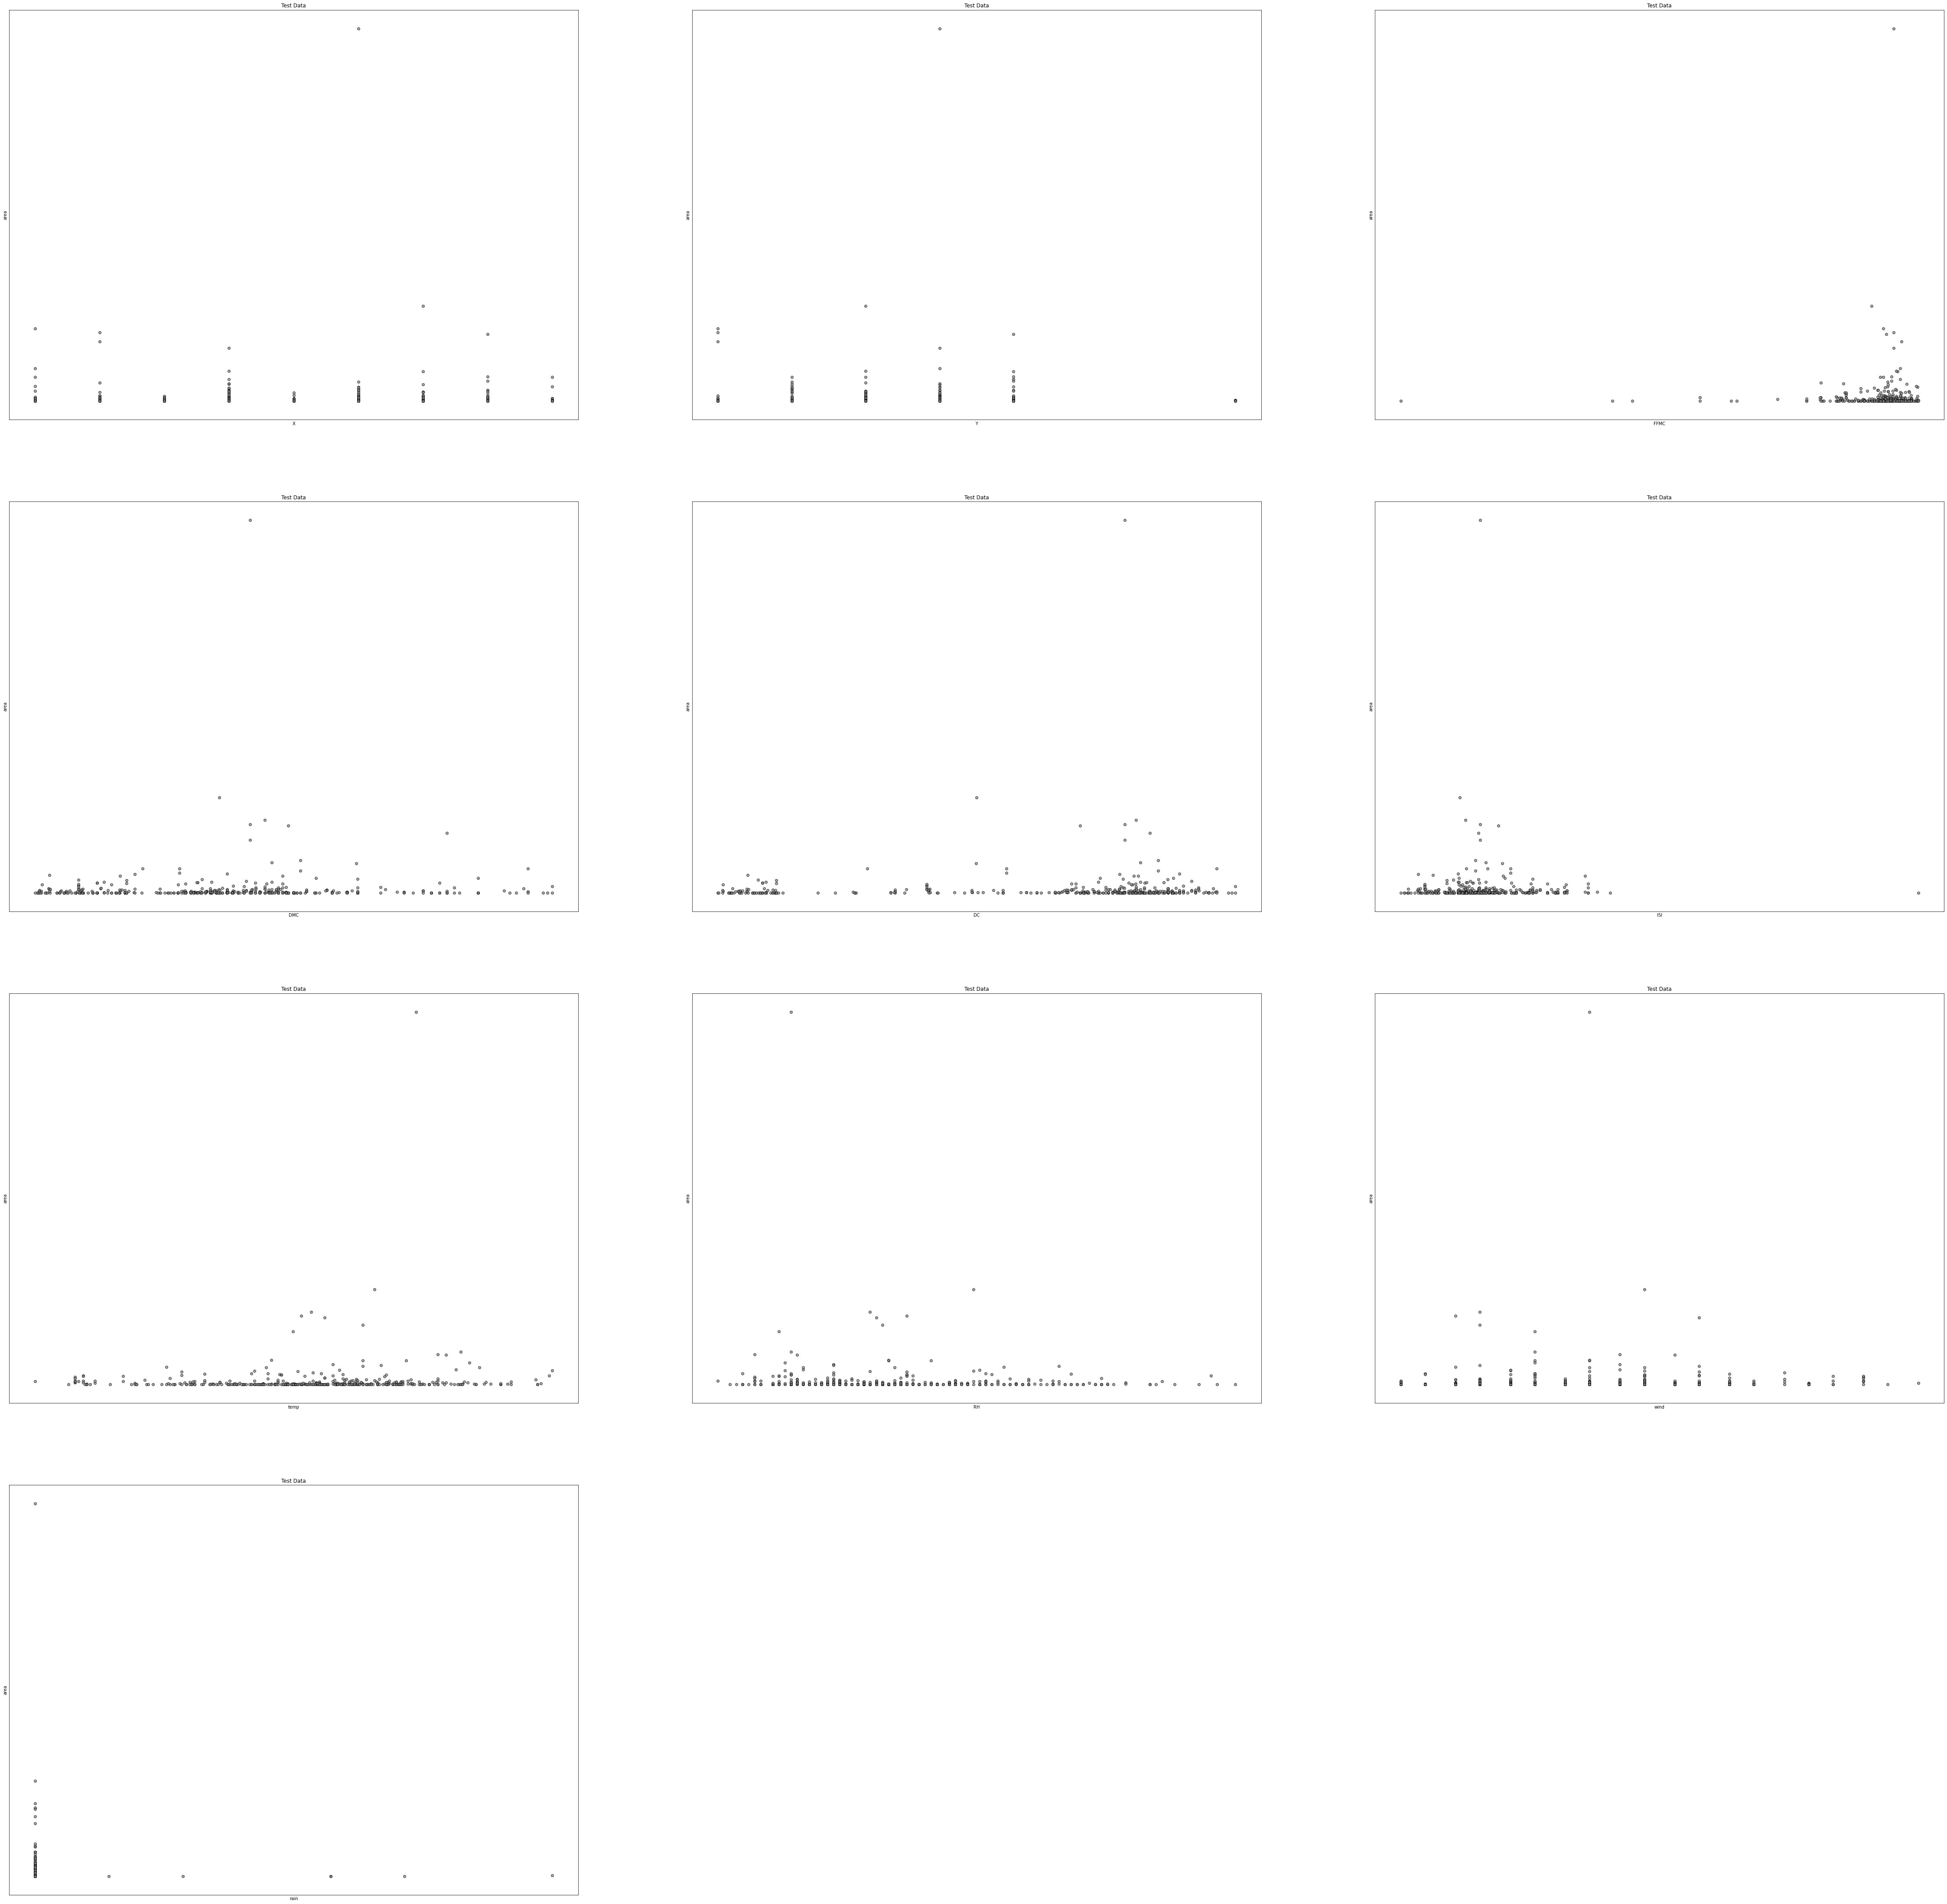

In [8]:
features =["X", "Y" ,"FFMC" ,"DMC" ,"DC","ISI","temp","RH","wind", "rain"]   
viz = df[features]   
plt.figure(figsize=(80,80))
for i, e in enumerate(viz.columns):
       plt.subplot(4,3, i+1)
       plt.scatter(x_train[e], y_train,  color='red', edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
       plt.title('Test Data')
       plt.xlabel(e)
       plt.ylabel('area')
       plt.xticks(())
       plt.yticks(())
plt.show()


###c - Créer et ajuster de modèle de régression linéaire multiple :

In [9]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Regarder les coefficients ( Bi avec i E {1, 2, ..., n} ) choisis par le modèle:

In [10]:
colum = pd.DataFrame(x_train.columns, columns = ['features'])
coef = pd.DataFrame(model.coef_, columns=['coef ( Bi ) '])
pd.concat([colum , coef], axis = 1, join = 'inner')

,features,coef ( Bi )
0,X,-1.244425e-15
1,Y,6.231127e-15
2,FFMC,8.785077e-16
3,DMC,2.441364e-16
4,DC,1.321319e-15
5,ISI,-2.513071e-16
6,temp,4.531104e-16
7,RH,5.427786e-16
8,wind,1.079994e-16
9,rain,-8.012234e-15


Regarder l'intercept B0 : 

In [11]:
model.intercept_

-8.615330671091215e-13

In [12]:
model.score(x_test, y_test)

1.0

###d - Comparaison de la valeur prédite à la valeur réelle : 
    

Dans cette partie de code, on va faire des prédictions sur le training set comme input, de meme pour le test set. Puis, on plot les prédictions et les Y d'origine pour vérifier que le modéle marche ou pas.  

In [13]:
import seaborn as sns

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    x2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('area')
    plt.ylabel('Proportion')

    plt.show()
    plt.close()

In [14]:
yhat_train = model.predict(x_train)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


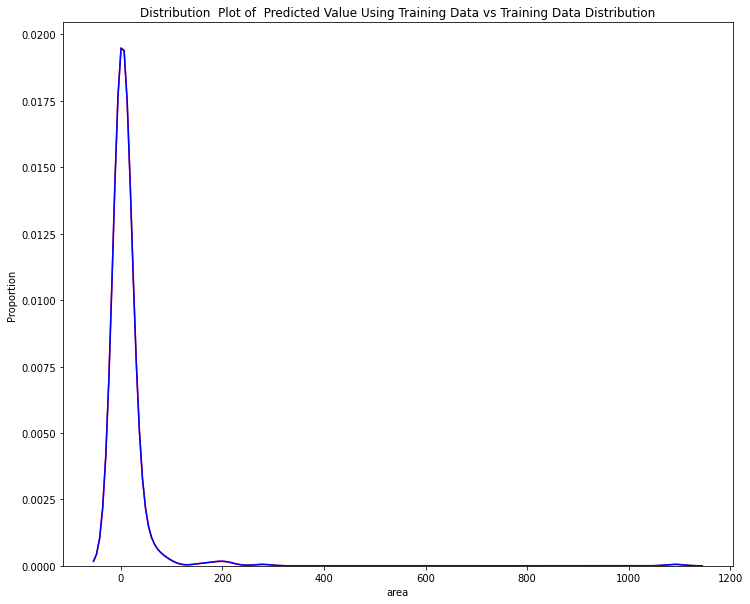

In [15]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [16]:
yhat_test = model.predict(x_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


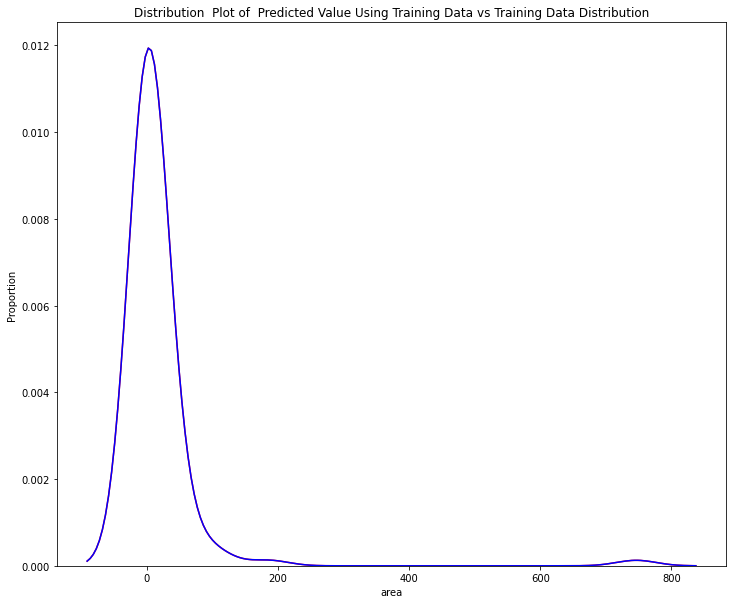

In [17]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, yhat_test, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [19]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, yhat_test), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, yhat_test), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, yhat_test), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, yhat_test), 2)) 
print("R2 score =", round(sm.r2_score(y_test, yhat_test), 2))

Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 1.0
R2 score = 1.0


-------

C/C : D'après les plots et les metrics d'evaluation, le modéle overfit.

-------

----

Utiliser le modèle Ridge pour la regularization et GridSearch pour selectionner le bon modèle  : 

----

In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

Use different values of alpha

In [185]:
parameters1= [{'alpha': [999999, 199999]}]

---
Creer le modèle Ridge

---

In [186]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

----
utilisation de  GridSearch pour la selection de modèle 

----

In [187]:
Grid = GridSearchCV(RR, parameters1,cv=4)
Grid.fit(x_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [999999, 199999]}], pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

----
On prend le meilleur modèle 

----

In [188]:
BestRR=Grid.best_estimator_
BestRR

Ridge(alpha=199999, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

affichage de score 

In [189]:
BestRR.score(x_test, y_test)

0.9858750103503893

----

prediction des valeurs de x_test pour les comparer à les anciennes 

----

In [190]:
pred = BestRR.predict(x_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


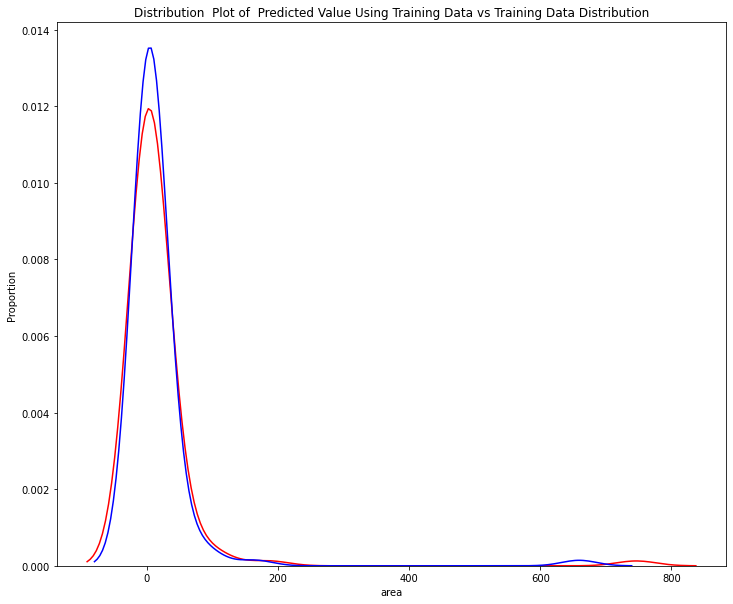

In [191]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, pred, "Actual Values (Train)", "Predicted Values (Train)", Title)

----

Maintenant on peut faire des predictions : 

----

In [199]:
x_pred = np.random.rand(29) * 10
x_pred = x_pred.reshape(-1, len(x_train.columns))
pred =BestRR.predict(x_pred)
print(" la prédiction est : ", pred)

 la prédiction est :  [4.16670847]
